In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
source('/oak/stanford/groups/mrivas/users/ytanigaw/repos/rivas-lab/ukbb-tools/04_gwas/check_gwas/plots/gwas_plot_misc.R')


In [3]:
annot_f <- '/scratch/groups/mrivas/ukbb24983/cal/annotation_20201002/ukb24983_cal_cALL_v2_hg19.vep101-loftee.Csq.tsv.gz'

snpnet_betas_f <- '/scratch/groups/mrivas/projects/PRS/private_output/202009_batch/HC.1-400/HC201/2_refit/snpnet.tsv'


In [4]:
fread(annot_f, select=c('#CHROM', 'POS', 'ID', 'Allele', 'Csq', 'Consequence', 'SYMBOL', 'gnomAD_AF', 'LoF')) %>%
rename('CHROM'='#CHROM') %>%
mutate(CHROM=if_else(CHROM == 'XY', 'X', CHROM)) %>%
compute_gwas_plot_df() -> annot_df


In [19]:
snpnet_betas_f %>% fread() %>% select(-CHROM, -POS) %>% left_join(annot_df, by='ID') -> df



In [63]:
plot_lake <- function(don){
    Csq_color <- get_Csq_color()
    don %>% compute_x_axis_df() -> axisdf
    don %>%
    left_join(Csq_color, by='Csq') %>% select(-Csq) %>% rename('Csq'='Csq_str') %>%
    ggplot( aes(x=POScum, y=BETA, label=repel_label) ) +
    geom_point( aes(color=as.factor(Csq)), alpha=0.8, size=1.3) +
    geom_hline(yintercept=0, color="#A0A0A0") +
    ggrepel::geom_text_repel(size=5, force=4) +
    scale_x_continuous(label = axisdf$CHROM_plot, breaks= axisdf$center) +
    theme_bw() + theme(
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank()
    ) + labs(
        color = 'Consequence',
        x = 'Genomic position (chromosome)',
        y = 'BETA'
    ) +
    scale_color_manual(
        breaks = Csq_color %>% pull(Csq_str),
        values = Csq_color %>% pull(Csq_color)
    )
}


In [80]:
df%>%
mutate(
    SYMBOL = if_else(ID == 'DRB1_103', 'DRB1_103', SYMBOL),
    Csq    = if_else(ID == 'DRB1_103', 'pav', Csq),
    POScum = if_else(ID == 'DRB1_103', 1094272075, POScum)
) %>%
replace_na(list(SYMBOL='', Csq='pav', POScum=1094272075)) %>%
mutate(repel_label = if_else(rank(-abs(BETA)) <= 30 | (ID %in% (df %>% filter(Csq == 'ptv') %>% filter(rank(-abs(BETA)) <= 5) %>% pull(ID))), SYMBOL, '')) %>%
plot_lake() +
labs(title='Ulcerative colitis')+
theme(
    title = element_text(size=16),
    legend.title = element_text(size=14),
    legend.text  = element_text(size=12),
    axis.text=element_text(size=16), 
    axis.title=element_text(size=16),
    legend.position = c(.9, .6)
) -> p_lake


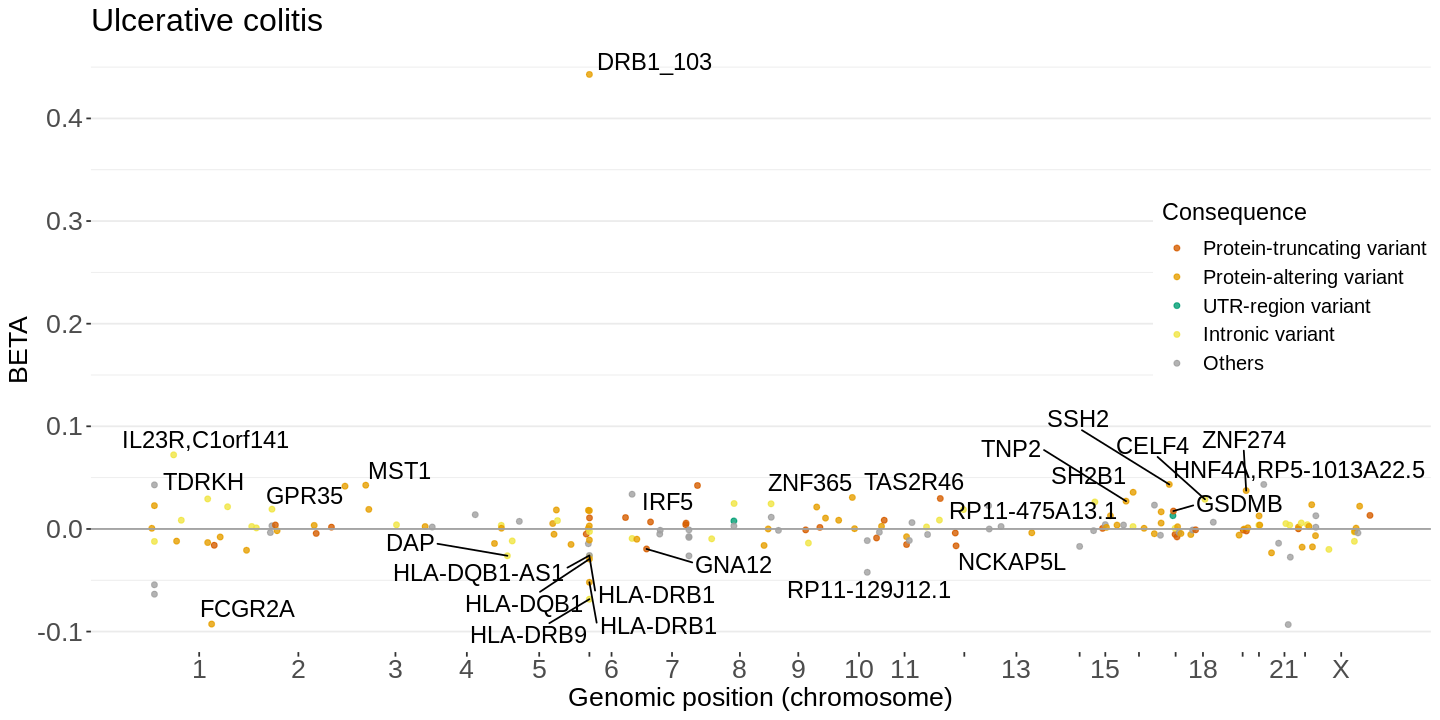

In [81]:
options(repr.plot.width=12, repr.plot.height=6)
p_lake

In [82]:
ggsave('plots/p_lake.HC201.pdf', p_lake, width=14, height=7)
ggsave('plots/p_lake.HC201.png', p_lake, width=14, height=7)

In [41]:
df %>% filter(is.na(Csq))

ID,REF,ALT,BETA,CHROM,POS,Allele,Csq,Consequence,SYMBOL,gnomAD_AF,LoF,POScum
<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
A_201,N,P,0.01790452,NA,NA,NA,NA,NA,NA,NA,NA,NA
DRB1_103,N,P,0.44285790,NA,NA,NA,NA,NA,NA,NA,NA,NA
DQA1_301,N,P,-0.01080329,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [39]:
df %>% count(Csq)

Csq,n
<chr>,<int>
intron,36
others,45
pav,64
ptv,29
utr,2
NA,3


In [83]:
df %>%
filter(Csq == 'ptv') %>%
filter(rank(-abs(BETA)) <= 5) %>%
arrange(POScum) %>%
select(CHROM, POS, ID, BETA, SYMBOL, Consequence) %>%
rename('#CHROM' = 'CHROM') %>%
fwrite('plots/p_lake.HC201.tsv', sep='\t', na = "NA", quote=F)


In [46]:
df %>%
filter(Csq == 'ptv') %>%
arrange(-abs(BETA)) %>%
head(30)


ID,REF,ALT,BETA,CHROM,POS,Allele,Csq,Consequence,SYMBOL,gnomAD_AF,LoF,POScum
<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
rs2004640,G,T,0.0423403000,7,128578301,T,ptv,splice_donor_variant,IRF5,NA,LC,1361211231
rs2708381,C,T,0.0296598100,12,11214145,T,ptv,stop_gained,TAS2R46,2.275e-01,LC,1960754937
rs798489,C,T,-0.0195013000,7,2801803,T,ptv,splice_donor_variant,GNA12,NA,NA,1235434733
rs11078928,T,C,0.0174309300,17,38064469,C,ptv,splice_acceptor_variant,GSDMB,3.989e-01,HC,2536394805
Affx-52327274,GT,G,-0.0164389900,12,50189833,-,ptv,frameshift_variant,NCKAP5L,NA,HC,1999730625
Affx-52322479,AG,A,-0.0159077700,1,167893758,-,ptv,frameshift_variant,MPC2,NA,HC,167893758
rs1939749,T,C,-0.0152072700,11,62910849,C,ptv,splice_donor_variant,SLC22A24,8.351e-01,LC,1877506521
rs237520,T,G,0.0132318800,X,142967468,G,ptv,stop_gained,UBE2NL,6.304e-01,LC,3021812750
Affx-52341161,GC,G,0.0111078600,6,121768924,-,ptv,frameshift_variant,GJA1,8.078e-05,HC,1183494120


In [45]:
df %>% arrange(POScum) %>%
filter(Csq == 'ptv', LoF=='HC') %>%
head(30)

ID,REF,ALT,BETA,CHROM,POS,Allele,Csq,Consequence,SYMBOL,gnomAD_AF,LoF,POScum
<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
Affx-52322479,AG,A,-0.0159077700,1,167893758,-,ptv,frameshift_variant,MPC2,NA,HC,167893758
rs2276611,G,A,-0.0043701210,2,170441001,A,ptv,splice_donor_variant,PPIG,1.689e-01,HC,419663528
Affx-52341161,GC,G,0.0111078600,6,121768924,-,ptv,frameshift_variant,GJA1,8.078e-05,HC,1183494120
rs72364644,GGCTTCAGCTACCGCTTGCAAGGCCGCATGACCTAT,G,0.0056859360,7,100385561,-,ptv,frameshift_variant,ZAN,2.803e-01,HC,1333018491
Affx-89026571,A,AA,0.0015098710,9,125391771,A,ptv,frameshift_variant,OR1B1,NA,HC,1663445278
rs2736911,C,T,-0.0087689540,10,124214355,T,ptv,stop_gained,ARMS2,1.312e-01,HC,1803369801
Affx-52327274,GT,G,-0.0164389900,12,50189833,-,ptv,frameshift_variant,NCKAP5L,NA,HC,1999730625
rs11078928,T,C,0.0174309300,17,38064469,C,ptv,splice_acceptor_variant,GSDMB,3.989e-01,HC,2536394805
rs3745540,A,G,-0.0011410780,19,51535130,G,ptv,splice_donor_variant,KLK12,5.795e-01,HC,2708984328


In [37]:
df %>% arrange(POScum) %>%
arrange(-abs(BETA)) %>%
head(30)

ID,REF,ALT,BETA,CHROM,POS,Allele,Csq,Consequence,SYMBOL,gnomAD_AF,LoF,POScum
<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
DRB1_103,N,P,0.44285790,NA,NA,NA,NA,NA,NA,NA,NA,NA
rs2836878,G,A,-0.09317168,21,40465534,A,others,regulatory_region_variant,NA,NA,NA,2819972957
rs1801274,A,G,-0.09269249,1,161479745,G,pav,missense_variant,FCGR2A,0.4757000,NA,161479745
rs1004819,G,A,0.07220394,1,67670213,A,intron,intron_variant,"IL23R,C1orf141",NA,NA,67670213
Affx-28475675,A,G,-0.06847643,6,32429594,G,intron,intron_variant,HLA-DRB9,NA,NA,1094154790
rs4654897,T,C,-0.06356878,1,20191436,C,others,intergenic_variant,NA,NA,NA,20191436
rs2314757,C,T,-0.05438379,1,20131771,T,others,intergenic_variant,NA,NA,NA,20131771
Affx-28486470,A,G,-0.05197326,6,32546879,G,pav,missense_variant,HLA-DRB1,0.0004171,NA,1094272075
rs2289629,G,A,0.04337577,17,27959903,A,pav,missense_variant,SSH2,0.2791000,NA,2526290239
